<a href="https://colab.research.google.com/github/JinKim1/classMachineLearning/blob/master/ML_assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning note for DongJin

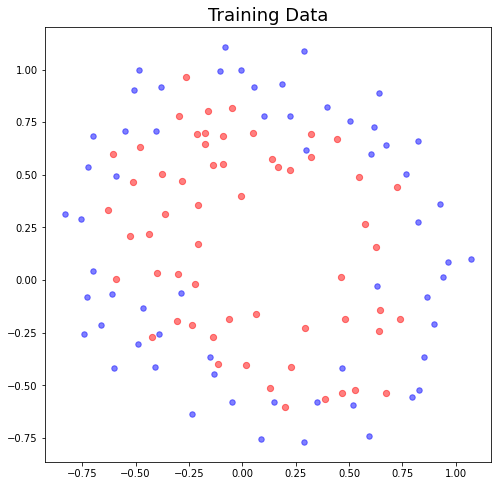

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

x  = data[:, 0]
y  = data[:, 1]
l   = data[:, 2]

x_0 = x[l == 0]
y_0 = y[l == 0]

x_1 = x[l == 1]
y_1 = y[l == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_0, y_0,alpha=0.5,s=30, c='b')
plt.scatter(x_1, y_1,alpha=0.5,s=39, c='r')
plt.title('Training Data',fontsize=18)
# plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [155]:
n_data = len(x)              # 데이터 수
lter_num = 10000            # 반복 수
learning_rate = 0.01

def s(z):
    return 1 / (1+np.exp(-z))

w1_guess = np.array(range(lter_num),dtype=float)     # 변수 저장용 배열 선언
w2_guess = np.array(range(lter_num),dtype=float)
w3_guess = np.array(range(lter_num),dtype=float)
w4_guess = np.array(range(lter_num),dtype=float)
w5_guess = np.array(range(lter_num),dtype=float)
w6_guess = np.array(range(lter_num),dtype=float)
w7_guess = np.array(range(lter_num),dtype=float)
w8_guess = np.array(range(lter_num),dtype=float)
w9_guess = np.array(range(lter_num),dtype=float)
b_guess = np.array(range(lter_num),dtype=float)
cost_guess = np.array(range(lter_num),dtype=float)

W1 = 0.0     # 초기값 설정
W2 = 0.0
W3 = 0.0
W4 = 0.0
W5 = 0.0
W6 = 0.0
W7 = 0.0
W8 = 0.0
W9 = 0.0
b = 0.0      # 초기값 설정

for i in range(0,lter_num):
    z = W1*x*x + W2*x + W3*y*y + W4*y + W5*x*y + b   # 예측함수
    cost = np.sum(  -l*np.log(s(z)) - (1-l)*np.log(1-s(z))  )/n_data

    w1_guess[i] = W1          # 반복마다 값들 저장
    w2_guess[i] = W2
    w3_guess[i] = W3
    w4_guess[i] = W4
    w5_guess[i] = W5
    w6_guess[i] = W6
    w7_guess[i] = W7
    w8_guess[i] = W8
    w9_guess[i] = W9
    b_guess[i] = b
    cost_guess[i] = cost

    gradient_w1 = np.sum((s(z)-l)*x*x)/n_data
    gradient_w2 = np.sum((s(z)-l)*x)/n_data
    gradient_w3 = np.sum((s(z)-l)*y*y)/n_data
    gradient_w4 = np.sum((s(z)-l)*y)/n_data
    gradient_w5 = np.sum((s(z)-l)*x*y)/n_data
    gradient_w6 = np.sum((s(z)-l)*y)/n_data
    gradient_w7 = np.sum((s(z)-l)*y)/n_data
    gradient_w8 = np.sum((s(z)-l)*y)/n_data
    gradient_w9 = np.sum((s(z)-l)*y)/n_data
    gradient_b = np.sum((s(z)-l))/n_data            # b에 대해 편미분

    W1 -= learning_rate * gradient_w1  # 러닝레이트에 따라 경사도를 따라 값을 변화시킨다
    W2 -= learning_rate * gradient_w2
    W3 -= learning_rate * gradient_w3
    W4 -= learning_rate * gradient_w4
    W5 -= learning_rate * gradient_w5
    W6 -= learning_rate * gradient_w6
    W7 -= learning_rate * gradient_w7
    W8 -= learning_rate * gradient_w8
    W9 -= learning_rate * gradient_w9
    b -= learning_rate * gradient_b

print(W1,W2,W3,W4,W5,b)  # 학습 후 W1,W2,W3,b 값 확인
print(cost)  # 학습 후 cost값 확인


-5.888774996663579 1.17606700238516 -5.382673736622538 1.7175303413157939 -2.5385033692452903 2.5402610095242704
0.41049886844005595


In [156]:
W1*x*x + W2*x + W3*y*y + W4*y + W5*x*y + b
print(z)
print(l)
print(l[0])
good = 0
for i in range(0,n_data):
    if(z[i]>0):
        if(l[i]==1):
            good+=1
    if(z[i]<0):
        if(l[i]==0):
            good+=1
print(good)
print(n_data)


[ 1.06133652e+00  1.19293518e+00  1.00503106e+00  1.25420737e+00
  6.24735621e-01  7.04317105e-01  1.22650986e+00  9.51140115e-01
  1.00152406e+00  4.60914787e-01 -1.74405955e-02 -1.44417864e-01
  5.46100503e-01  5.44239128e-02  3.04597364e-01  1.00577944e+00
  1.70818969e+00  3.83011446e-01  1.03451596e+00  3.24524443e-01
 -3.06375609e-01 -1.86718571e-02 -2.18816235e-01 -1.58983667e-01
  6.78701654e-01 -1.35734801e-01 -2.23331970e-02 -8.87812975e-01
  1.78881735e+00  3.31716830e-01 -8.73648432e-01  4.41083323e-01
  1.29537211e+00  1.68441225e+00  1.63443900e+00  1.71999265e+00
  1.18825323e+00  1.90920831e+00  2.19383905e+00  1.12105943e+00
  1.87436301e+00  1.45832680e+00  7.32961744e-01  1.84008764e+00
  8.45124844e-01  9.48413406e-01 -8.18585422e-01  1.63150906e+00
 -1.15347098e-01  3.52058881e-01  1.59612016e+00  2.36514207e+00
  1.81298650e+00  2.15822318e+00  2.26847433e+00  1.25389157e+00
  1.95871956e+00  1.29895732e+00 -9.65011840e-01  1.29488733e-01
  8.95618535e-01 -1.13940

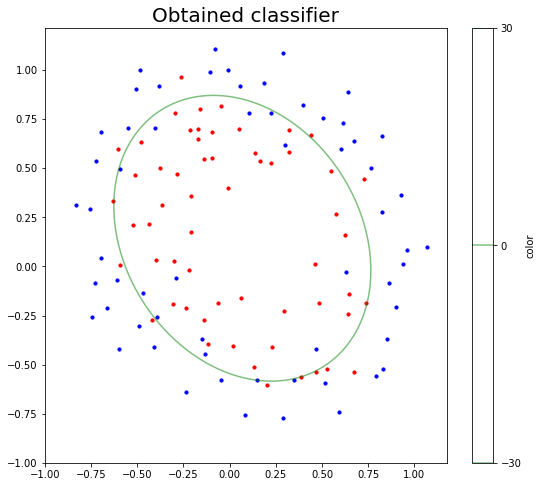

In [157]:
x_g = np.arange(-1,1,0.01)
y_g = np.arange(-1,1,0.01)
x_g,y_g = np.meshgrid(x_g,y_g)

plt.figure(figsize=(9, 8))
plt.contour(x_g, y_g,W1*x_g*x_g + W2*x_g + W3*y_g*y_g + W4*y_g + W5*x_g*y_g + b,colors="g",levels=[-30,0,30],alpha=0.5,linestyles=["--","-","--"])


plt.colorbar(label='color')
plt.scatter(x_0, y_0, s=10,alpha=1, c='b')
plt.scatter(x_1, y_1, s=10,alpha=1, c='r')
plt.title('Obtained classifier',fontsize=20)
plt.show()

